In [ ]:
#hide
#all_slow

In [ ]:
#hide
#default_exp network
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# network

>Analyzing groups of glycans as networks (e.g., biosynthesis networks)

In [ ]:
#export
from glycowork.network.biosynthesis import *
from glycowork.network.evolution import *

`network` contains functions to arrange and analyze glycans in the context of networks. In such a network, each node represents a glycan and edges represent, for instance, their connection via a biosynthetic step. It should be noted, since `glycowork` treats glycans as molecular graphs, that these networks represent hierarchical graphs, with the network being one graph and each node within the network also a graph. `network` contains the following modules:
- `biosynthesis` contains functions to construct and analyze biosynthetic glycan networks
- `evolution` contains functions to compare (taxonomic) groups as to their glycan repertoires

## biosynthesis
>constructing and analyzing biosynthetic glycan networks

In [ ]:
show_doc(construct_network)

<h4 id="construct_network" class="doc_header"><code>construct_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L186" class="source_link" style="float:right">[source]</a></h4>

> <code>construct_network</code>(**`glycans`**, **`add_virtual_nodes`**=*`'exhaustive'`*, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`limit`**=*`5`*, **`ptm`**=*`True`*, **`allowed_ptms`**=*`['OS', '3S', '6S', '1P', '6P', 'OAc', '4Ac']`*, **`permitted_roots`**=*`['Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol']`*, **`directed`**=*`False`*, **`edge_type`**=*`'monolink'`*)

visualize biosynthetic network

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed format
| add_virtual_nodes (string): indicates whether no ('none'), proximal ('simple'), or all ('exhaustive') virtual nodes should be added; default:'exhaustive'
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends
| limit (int): maximum number of virtual nodes between observed nodes; default:5
| ptm (bool): whether to consider post-translational modifications in the network construction; default:True
| allowed_ptms (list): list of PTMs to consider
| permitted_roots (list): which nodes should be considered as roots; default:["Gal(b1-4)Glc-ol", "Gal(b1-4)GlcNAc-ol"]
| directed (bool): whether to return a network with directed edges in the direction of biosynthesis; default:False
| edge_type (string): indicates whether edges represent monosaccharides ('monosaccharide')or monosaccharide(linkage) ('monolink'); default:'monolink'

| Returns:
| :-
| Returns a networkx object of the network

In [ ]:
show_doc(plot_network)

<h4 id="plot_network" class="doc_header"><code>plot_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L284" class="source_link" style="float:right">[source]</a></h4>

> <code>plot_network</code>(**`network`**, **`plot_format`**=*`'kamada_kawai'`*, **`edge_label_draw`**=*`True`*, **`node_size`**=*`False`*)

visualizes biosynthetic network

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| plot_format (string): how to layout network, either 'kamada_kawai' or 'spring'; default:'kamada_kawai'
| edge_label_draw (bool): draws edge labels if True; default:True
| node_size (bool): whether nodes should be sized by an "abundance" attribute in network; default:False

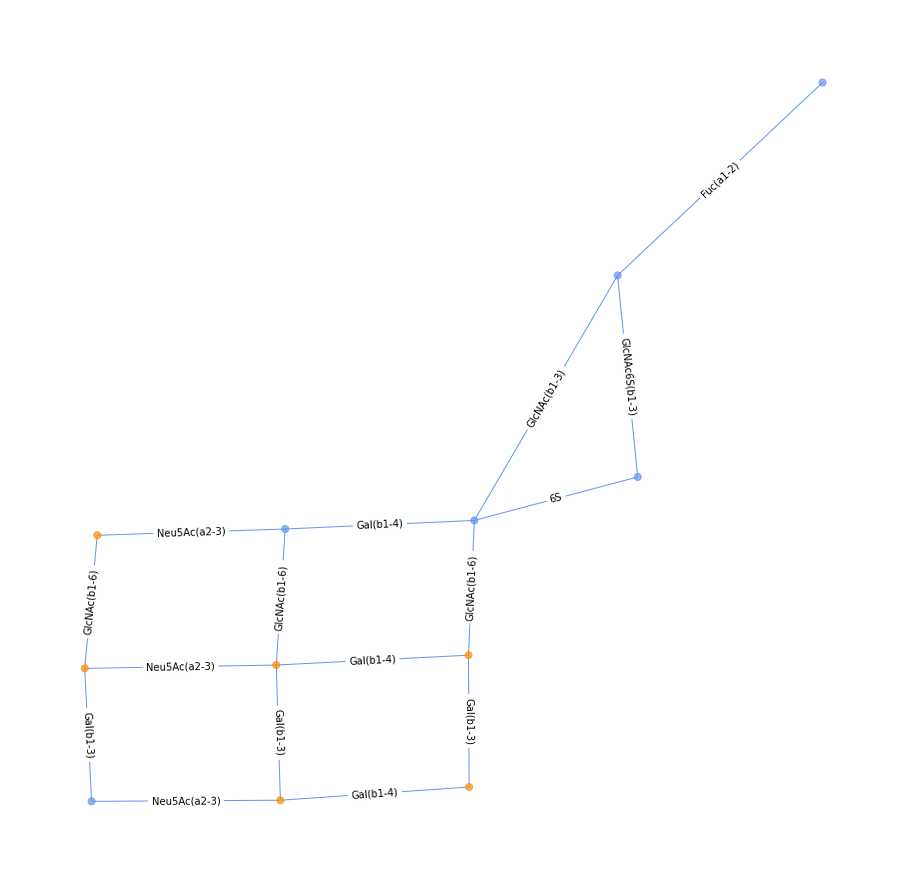

In [ ]:
glycans = ["Gal(b1-4)Glc-ol", "GlcNAc(b1-3)Gal(b1-4)Glc-ol",
           "GlcNAc6S(b1-3)Gal(b1-4)Glc-ol",
           "Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol", "Fuc(a1-2)Gal(b1-4)Glc-ol",
          "Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol"]
network = construct_network(glycans)
plot_network(network)

In [ ]:
show_doc(find_diff)

<h4 id="find_diff" class="doc_header"><code>find_diff</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L153" class="source_link" style="float:right">[source]</a></h4>

> <code>find_diff</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*)

finds the subgraph that differs between glycans and returns it, will only work if the differing subgraph is connected

| Arguments:
| :-
| glycan_a (string): glycan in IUPAC-condensed format
| glycan_b (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns difference between glycan_a and glycan_b in IUPAC-condensed

In [ ]:
find_diff('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
         'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

'Fuc(a1-6)'

In [ ]:
show_doc(get_virtual_nodes)

<h4 id="get_virtual_nodes" class="doc_header"><code>get_virtual_nodes</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L424" class="source_link" style="float:right">[source]</a></h4>

> <code>get_virtual_nodes</code>(**`glycan`**, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*)

find unobserved biosynthetic precursors of a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends

| Returns:
| :-
| (1) list of virtual node graphs
| (2) list of virtual nodes in IUPAC-condensed format

In [ ]:
get_virtual_nodes('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol')

([<networkx.classes.graph.Graph at 0x215ab878fd0>,
 ['Man(a1-6)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol',
  'Man(a1-3)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol'])

In [ ]:
show_doc(find_shared_virtuals)

<h4 id="find_shared_virtuals" class="doc_header"><code>find_shared_virtuals</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L333" class="source_link" style="float:right">[source]</a></h4>

> <code>find_shared_virtuals</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`min_size`**=*`1`*)

finds virtual nodes that are shared between two glycans (i.e., that connect these two glycans)

| Arguments:
| :-
| glycan_a (string): glycan in IUPAC-condensed format
| glycan_b (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends
| min_size (int): length of smallest root in biosynthetic network; default:1

| Returns:
| :-
| Returns list of edges between glycan and virtual node (if virtual node connects the two glycans)

In [ ]:
find_shared_virtuals('GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
                    'GlcNAc(b1-2)Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol')

[('GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol'),
 ('GlcNAc(b1-2)Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol')]

In [ ]:
show_doc(find_path)

<h4 id="find_path" class="doc_header"><code>find_path</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L505" class="source_link" style="float:right">[source]</a></h4>

> <code>find_path</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`limit`**=*`5`*)

find virtual node path between two glycans

| Arguments:
| :-
| glycan_a (string): glycan in IUPAC-condensed format
| glycan_b (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends
| limit (int): maximum number of virtual nodes between observed nodes; default:5

| Returns:
| :-
| (1) list of edges to connect glycan_a and glycan_b via virtual nodes
| (2) dictionary of edge labels detailing difference between two connected nodes

In [ ]:
find_path('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol','Gal(b1-4)Glc-ol')

([('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc(b1-3)Gal(b1-4)Glc-ol'),
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol')],
 {('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol',
   'GlcNAc(b1-3)Gal(b1-4)Glc-ol'): 'Gal(b1-4)',
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol'): 'GlcNAc(b1-3)'})

In [ ]:
show_doc(find_shortest_path)

<h4 id="find_shortest_path" class="doc_header"><code>find_shortest_path</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L563" class="source_link" style="float:right">[source]</a></h4>

> <code>find_shortest_path</code>(**`goal_glycan`**, **`glycan_list`**, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`limit`**=*`5`*)

finds the glycan with the shortest path via virtual nodes to the goal glycan

| Arguments:
| :-
| goal_glycan (string): glycan in IUPAC-condensed format
| glycan_list (list): list of glycans in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends
| limit (int): maximum number of virtual nodes between observed nodes; default:5

| Returns:
| :-
| (1) list of edges of shortest path to connect goal_glycan and glycan via virtual nodes
| (2) dictionary of edge labels detailing difference between two connected nodes in shortest path

In [ ]:
find_shortest_path('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol',
                  ['Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol'])

([('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc(b1-3)Gal(b1-4)Glc-ol'),
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol')],
 {('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol',
   'GlcNAc(b1-3)Gal(b1-4)Glc-ol'): 'Gal(b1-4)',
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol'): 'GlcNAc(b1-3)'})

In [ ]:
show_doc(network_alignment)

<h4 id="network_alignment" class="doc_header"><code>network_alignment</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L619" class="source_link" style="float:right">[source]</a></h4>

> <code>network_alignment</code>(**`network_a`**, **`network_b`**)

combines two networks into a new network

| Arguments:
| :-
| network_a (networkx object): biosynthetic network from construct_network
| network_b (networkx object): biosynthetic network from construct_network

| Returns:
| :-
| Returns combined network as a networkx object

In [ ]:
show_doc(infer_network)

<h4 id="infer_network" class="doc_header"><code>infer_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L680" class="source_link" style="float:right">[source]</a></h4>

> <code>infer_network</code>(**`network`**, **`network_species`**, **`species_list`**, **`filepath`**=*`None`*, **`df`**=*`None`*, **`add_virtual_nodes`**=*`'exhaustive'`*, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`limit`**=*`5`*, **`ptm`**=*`False`*, **`allowed_ptms`**=*`['OS', '3S', '6S', '1P', '6P', 'OAc', '4Ac']`*, **`permitted_roots`**=*`['Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol']`*, **`directed`**=*`False`*)

replaces virtual nodes if they are observed in other species

| Arguments:
| :-
| network (networkx object): biosynthetic network that should be inferred
| network_species (string): species from which the network stems
| species_list (list): list of species to compare network to
| filepath (string): filepath to load biosynthetic networks from other species, if precalculated (def. recommended, as calculation will take ~1.5 hours); default:None
| df (dataframe): dataframe containing species-specific glycans, only needed if filepath=None;default:None
| add_virtual_nodes (string): indicates whether no ('None'), proximal ('simple'), or all ('exhaustive') virtual nodes should be added;only needed if filepath=None;default:'exhaustive'
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used;only needed if filepath=None
| reducing_end (list): monosaccharides at the reducing end that are allowed;only needed if filepath=None;default:milk glycan reducing ends
| limit (int): maximum number of virtual nodes between observed nodes;only needed if filepath=None;default:5
| ptm (bool): whether to consider post-translational modifications in the network construction; default:False
| allowed_ptms (list): list of PTMs to consider
| permitted_roots (list): which nodes should be considered as roots; default:["Gal(b1-4)Glc-ol", "Gal(b1-4)GlcNAc-ol"]
| directed (bool): whether to return a network with directed edges in the direction of biosynthesis; default:False

| Returns:
| :-
| Returns network with filled in virtual nodes

In [ ]:
show_doc(retrieve_inferred_nodes)

<h4 id="retrieve_inferred_nodes" class="doc_header"><code>retrieve_inferred_nodes</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L726" class="source_link" style="float:right">[source]</a></h4>

> <code>retrieve_inferred_nodes</code>(**`network`**, **`species`**=*`None`*)

returns the inferred virtual nodes of a network that has been used with infer_network

| Arguments:
| :-
| network (networkx object): biosynthetic network with inferred virtual nodes
| species (string): species from which the network stems (only relevant if multiple species in network); default:None

| Returns:
| :-
| Returns inferred nodes as list or dictionary (if species argument is used)

In [ ]:
show_doc(update_network)

<h4 id="update_network" class="doc_header"><code>update_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L822" class="source_link" style="float:right">[source]</a></h4>

> <code>update_network</code>(**`network_in`**, **`edge_list`**, **`edge_labels`**=*`None`*, **`node_labels`**=*`None`*)

updates a network with new edges and their labels

| Arguments:
| :-
| network (networkx object): network that should be modified
| edge_list (list): list of edges as node tuples
| edge_labels (list): list of edge labels as strings
| node_labels (dict): dictionary of form node:0 or 1 depending on whether the node is observed or virtual

| Returns:
| :-
| Returns network with added edges

In [ ]:
show_doc(choose_path)

<h4 id="choose_path" class="doc_header"><code>choose_path</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L1020" class="source_link" style="float:right">[source]</a></h4>

> <code>choose_path</code>(**`source`**, **`target`**, **`species_list`**, **`filepath`**, **`libr`**=*`None`*)

given a diamond-shape in biosynthetic networks (A->B,A->C,B->D,C->D), which path is taken from A to D?

| Arguments:
| :-
| source (string): glycan node that is the biosynthetic precursor
| target (string): glycan node that is the biosynthetic product; has to two biosynthetic steps away from source
| species_list (list): list of species to compare network to
| filepath (string): filepath to load biosynthetic networks from other species
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns dictionary of each intermediary glycan and its proportion (0-1) of how often it has been experimentally observed in this path

In [ ]:
show_doc(infuse_network)

<h4 id="infuse_network" class="doc_header"><code>infuse_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L998" class="source_link" style="float:right">[source]</a></h4>

> <code>infuse_network</code>(**`network`**, **`node_df`**, **`node_abundance`**=*`True`*, **`glycan_col`**=*`'target'`*, **`intensity_col`**=*`'rel_intensity'`*)

add new data to an existing network, such as glycomics abundance data

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| node_df (dataframe): dataframe containing glycans and their relative intensity
| node_abundance (bool): whether to add node abundance to the network as the node attribute "abundance"; default:True
| glycan_col (string): column name of the glycans in node_df
| intensity_col (string): column name of the relative intensities in node_df

| Returns:
| :-
| Returns a network with added information

In [ ]:
show_doc(export_network)

<h4 id="export_network" class="doc_header"><code>export_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L955" class="source_link" style="float:right">[source]</a></h4>

> <code>export_network</code>(**`network`**, **`filepath`**)

converts NetworkX network into files usable by Gephi

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| filepath (string): should describe a valid path + file name prefix, will be appended by file description and type

| Returns:
| :-
| (1) saves a .csv dataframe containing the edge list and edge labels
| (2) saves a .csv dataframe containing node IDs and labels

## evolution
>constructing evolutionary networks based on glycans

In [ ]:
show_doc(distance_from_embeddings)

<h4 id="distance_from_embeddings" class="doc_header"><code>distance_from_embeddings</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L7" class="source_link" style="float:right">[source]</a></h4>

> <code>distance_from_embeddings</code>(**`df`**, **`embeddings`**, **`cut_off`**=*`10`*, **`rank`**=*`'Species'`*, **`averaging`**=*`'median'`*)

calculates a cosine distance matrix from learned embeddings

| Arguments:
| :-
| df (dataframe): dataframe with glycans as rows and taxonomic information as columns
| embeddings (dataframe): dataframe with glycans as rows and learned embeddings as columns (e.g., from glycans_to_emb)
| cut_off (int): how many glycans a rank (e.g., species) needs to have at least to be included; default:10
| rank (string): which taxonomic rank to use for grouping organisms; default:'Species'
| averaging (string): how to average embeddings, by 'median' or 'mean'; default:'median'

| Returns:
| :-
| Returns a rank x rank distance matrix

In [ ]:
show_doc(distance_from_metric)

<h4 id="distance_from_metric" class="doc_header"><code>distance_from_metric</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L52" class="source_link" style="float:right">[source]</a></h4>

> <code>distance_from_metric</code>(**`df`**, **`networks`**, **`metric`**=*`'Jaccard'`*, **`cut_off`**=*`10`*, **`rank`**=*`'Species'`*)

calculates a distance matrix of generated networks based on provided metric

| Arguments:
| :-
| df (dataframe): dataframe with glycans as rows and taxonomic information as columns
| networks (list): list of networks in networkx format
| metric (string): which metric to use, available: 'Jaccard'; default:'Jaccard'
| cut_off (int): how many glycans a rank (e.g., species) needs to have at least to be included; default:10
| rank (string): which taxonomic rank to use for grouping organisms; default:'Species'

| Returns:
| :-
| Returns a rank x rank distance matrix

In [ ]:
show_doc(dendrogram_from_distance)

<h4 id="dendrogram_from_distance" class="doc_header"><code>dendrogram_from_distance</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L80" class="source_link" style="float:right">[source]</a></h4>

> <code>dendrogram_from_distance</code>(**`dm`**, **`ylabel`**=*`'Mammalia'`*, **`filepath`**=*`''`*)

plots a dendrogram from distance matrix

| Arguments:
| :-
| dm (dataframe): a rank x rank distance matrix (e.g., from distance_from_embeddings)
| ylabel (string): how to label the y-axis of the dendrogram; default:'Mammalia'
| filepath (string): absolute path including full filename allows for saving the plot

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_alignment.ipynb.
Converted 02_glycan_data.ipynb.
Converted 03_ml.ipynb.
Converted 04_motif.ipynb.
Converted 05_examples.ipynb.
Converted 06_network.ipynb.
Converted index.ipynb.
